# Summary 

#### The data used in the experiments was collected from January 2000 to December 2003 and it was built using two sources. The first database was collected by the inspector that was responsible for the Montesinho fire occurrences. At a daily basis, every time a fores fire occurred, several features were registered, such as the time, date, spatial location, the type of vegetation involved, the six components of the FWI system and the total burned area. The second database was collected by the Braganc ̧a Polytechnic Institute, containing several weather observations (e.g. wind speed) that were recorded with a 30 minute period by a meteorological station located in the center of the Montesinho park. The two  databases were stored in tens of individual spreadsheets, under distinct formats, and a substantial manual effort was performed to integrate them into a single dataset with a total of 517 entries.

#### This data is available at: http://www.dsi.uminho.pt/ ̃pcortez/forestfires/
#### Alternatively, you can also get the dataset at : https://archive.ics.uci.edu/ml/datasets/forest+fires

----------------

Citation Request:
This dataset is public available for research. The details are described in [Cortez and Morais, 2007].
Please include this citation if you plan to use this database:

P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

#### The objective of this analysis is to predict forest fires on the basis of certain factors/variables. This To help the forest services department and related government agencies in detecting forest fires in a faster way that is autonomous and cheap by using meteorological data and thus preventing and /or suppressing the effect of forest fires more efficiently. 
#### We will also examine for any relationships in our EDA between different explanatory variables with respect to response variable 'area' to see their effect on forest fires.

----------
# Data Wrangling
-------------

In [1]:
# Load Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import seaborn as sns
import matplotlib.pyplot as plt

seed = 123

In [2]:
df = pd.read_csv('./forestfires.csv', sep=',')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.shape

(517, 13)

Dataset Description:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. ISI - ISI index from the FWI system: 0.0 to 56.10
8. DC - DC index from the FWI system: 7.9 to 860.6
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

Note: All entries denote fire occurrences and zero value means that an area lower than 1ha/100 = 100m2 was  burned.

For more information, read [Cortez and Morais, 2007].

In [4]:
print(f" No. of Duplicated Rows: {df.duplicated().sum()} \n")
df[df.duplicated(keep = False)]

 No. of Duplicated Rows: 4 



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
52,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
99,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
214,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
302,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


####  We oberve 4 duplicated rows are present, and these can add bias unnecessary. So we need to remove them.

In [5]:
data = df.drop(df[df.duplicated()].index).reset_index(drop = True)
data.duplicated().sum()

0

Dropped duplicated rows

In [6]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There are no missing or NA values

In [7]:
data.dtypes.value_counts()

float64    8
int64      3
object     2
dtype: int64

In [8]:
print(data.select_dtypes(include = 'object').nunique())

month    12
day       7
dtype: int64


In [9]:
pd.unique(data[['day', 'month']].values.ravel('K'))

# Alt Methods slower for larger datasets:-  
# 1) pd.concat([data['month'],data['day']]).unique() ; 
# 2) np.unique(df[['Col1', 'Col2']].values)

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu', 'mar', 'oct',
       'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan', 'dec', 'may',
       'nov'], dtype=object)

Data types are all 'float' and 'int' type except month and day columns. We further checked the number of months and days (12 and 7) to confirm they are no extra names (unknown strings/errors or typos).
Also as there are no missing values, we can confirm there are no misspelled NA values either like missing values denoted by NAN, '-', 'Missing' etc.


Note: For pandas 'unique' function on work on multiple columns, the input to the function needs to be one-dimensional, so multiple columns will need to be combined. ravel() is an array method that returns a view (if possible) of a multidimensional array. The argument 'K' tells the method to flatten the array in the order the elements are stored in the memory (pandas typically stores underlying arrays in Fortran-contiguous order; columns before rows). This can be significantly faster than using the method's default 'C' order.

# Splitting the Data
Before we will split our data into train and test sets to prevent data leakage, we will check our outcome variable distribution with histogram plot to help us decide how we should split our dataset. 

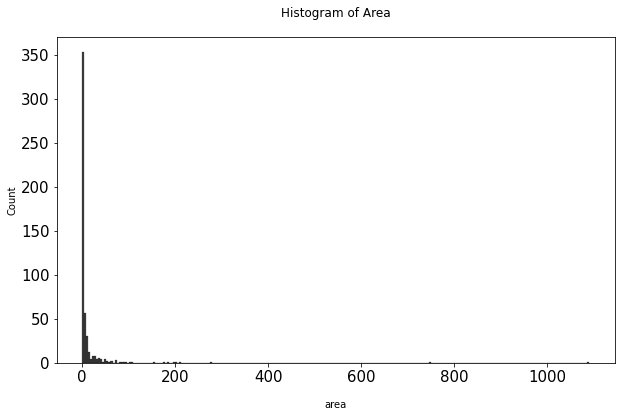

In [10]:
# Histogram for area

plt.figure(figsize = (10,6))
ax = sns.histplot(data['area'], bins = 250, color = 'Black')
ax.set_title("Histogram of Area", pad = 20)
ax.xaxis.labelpad = 15
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
plt.show()

We notice our outcome variable 'area' is heavily imbalanced, is right tailed and consists of lots of zeroes.
Stratified Shuffle split can be used so as to randomize grouping of train/test groups to decrease correlation and also help in preserving the percentage of samples for each class by returning stratified randomized folds. To use stratified shuffle split with continous outcome variable we need to discretize it first.

In [11]:
data['split'] = pd.cut(include_lowest = True, x = data['area'], bins = [0, 0.1, 2 ,5 ,10, 50, 1091])

In [12]:
data.split.value_counts()

(-0.001, 0.1]     245
(10.0, 50.0]       70
(0.1, 2.0]         62
(2.0, 5.0]         56
(5.0, 10.0]        56
(50.0, 1091.0]     24
Name: split, dtype: int64

After discretization we can use stratified shuffle split to split our data into training and test sets.

In [13]:
features = list(data.drop(columns = 'split').columns)

In [14]:
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, 
                                          test_size = 0.3, 
                                          random_state = seed)

train_idx, test_idx = next(strat_shuf_split.split(data[features], data.split))

# Create the dataframes
Xy_train = data.loc[train_idx, features]

Xy_test  = data.loc[test_idx, features]

len(Xy_train), len(Xy_test)

(359, 154)

In [15]:
Xy_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
311,3,4,sep,wed,91.2,134.7,817.5,7.2,18.5,30,2.7,0.0,0.0
332,7,4,sep,mon,91.6,108.4,764.0,6.2,19.3,44,2.2,0.0,0.0
172,1,4,aug,sat,90.2,96.9,624.2,8.9,14.2,53,1.8,0.0,3.5
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
457,8,6,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.0


In [16]:
## Saving after data wrangling, EDA and preprocessing of data.

outputfile_1 = 'forest_fires_deploy_train.csv'
outputfile_2 = 'forest_fires_deploy_test.csv'
Xy_train.to_csv(outputfile_1, index = False)
Xy_test.to_csv(outputfile_2, index = False)

----------------------------
# Exploratory Data Analysis
----------------------------

In [17]:
round(Xy_train.describe(),5)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000,359.00000
mean,4.69638,4.30084,91.02507,113.20947,550.99972,9.10613,19.08858,44.02507,4.05738,0.02674,14.85554
std,2.32301,1.25461,4.01608,64.20524,244.70372,3.96714,5.85177,16.35353,1.81886,0.35019,75.16785
min,1.00000,2.00000,53.40000,3.00000,7.90000,0.40000,2.20000,17.00000,0.90000,0.00000,0.00000
25%,3.00000,4.00000,90.30000,75.30000,435.50000,7.00000,15.70000,32.00000,2.70000,0.00000,0.00000
50%,5.00000,4.00000,91.70000,108.30000,664.50000,8.40000,19.50000,40.00000,4.00000,0.00000,0.52000
75%,7.00000,5.00000,92.90000,145.40000,715.10000,10.75000,23.25000,53.00000,5.40000,0.00000,6.70000
max,9.00000,9.00000,96.20000,291.30000,860.60000,22.60000,33.30000,99.00000,9.40000,6.40000,1090.84000


#### Looking at min max values, most seem to be in range. The median and mean values do not coincide for some variables including the outcome variable 'area' indicating skewness and there is huge difference between the median and min/max values of some variables indicating presence of outliers.

#### Note: The co-ordinates variable 'X' and 'Y' provide reference for the particular forest only and  a distance metric from  some  landmark like camping site, road etc would have been more useful for general analysis. (Thus, we can remove these co-ordinate variables if our analysis is not location specific (for this particular forest area) but a general one). Also, there is no direction given with wind speed which can affect the outcome variable depends on the location(co-ordinates). 

#### A subject experts advice would defintely be required to assess the quality of the variables indepth especially when trying to determine the reason for outliers if any.

#### We further note, variables are not scaled and all features are positive and some have minimum value of 0 as well.

In [18]:
print(Xy_train['day'].value_counts())

sat    65
fri    58
sun    58
mon    49
tue    48
thu    44
wed    37
Name: day, dtype: int64


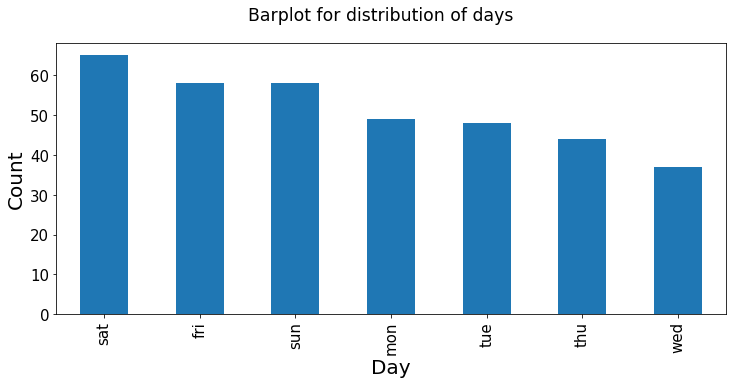

In [19]:
plt.figure(figsize=(12, 5))
ax = Xy_train['day'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Day", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.tick_params(labelsize = 15)
plt.suptitle('Barplot for distribution of days', fontsize = "xx-large")
plt.show()

#### Weekends and fridays (day before weekend) are the top 3 in terms of frequency of forest fires for the our dataset. We'll like to further explore this in terms of big and small fires. 

In [20]:
print(Xy_train['month'].value_counts())

aug    131
sep    118
mar     40
jul     25
feb     12
oct      9
dec      9
jun      9
apr      4
may      2
Name: month, dtype: int64


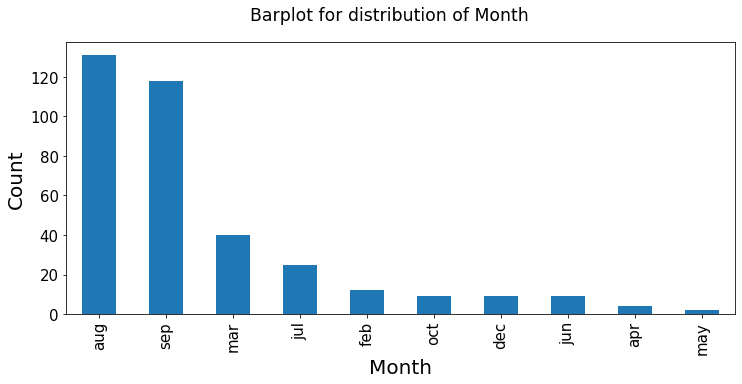

In [21]:
plt.figure(figsize=(12, 5))
ax = Xy_train['month'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Month", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.tick_params(labelsize = 15)
plt.suptitle('Barplot for distribution of Month', fontsize = "xx-large")
plt.show()

#### Here we see the months of 'August' and 'September' consists of the maximum amount of forest fires in our dataset, indicating fire is more prevalent in these months. We'll again like to further explore this in terms of big and small fires. 

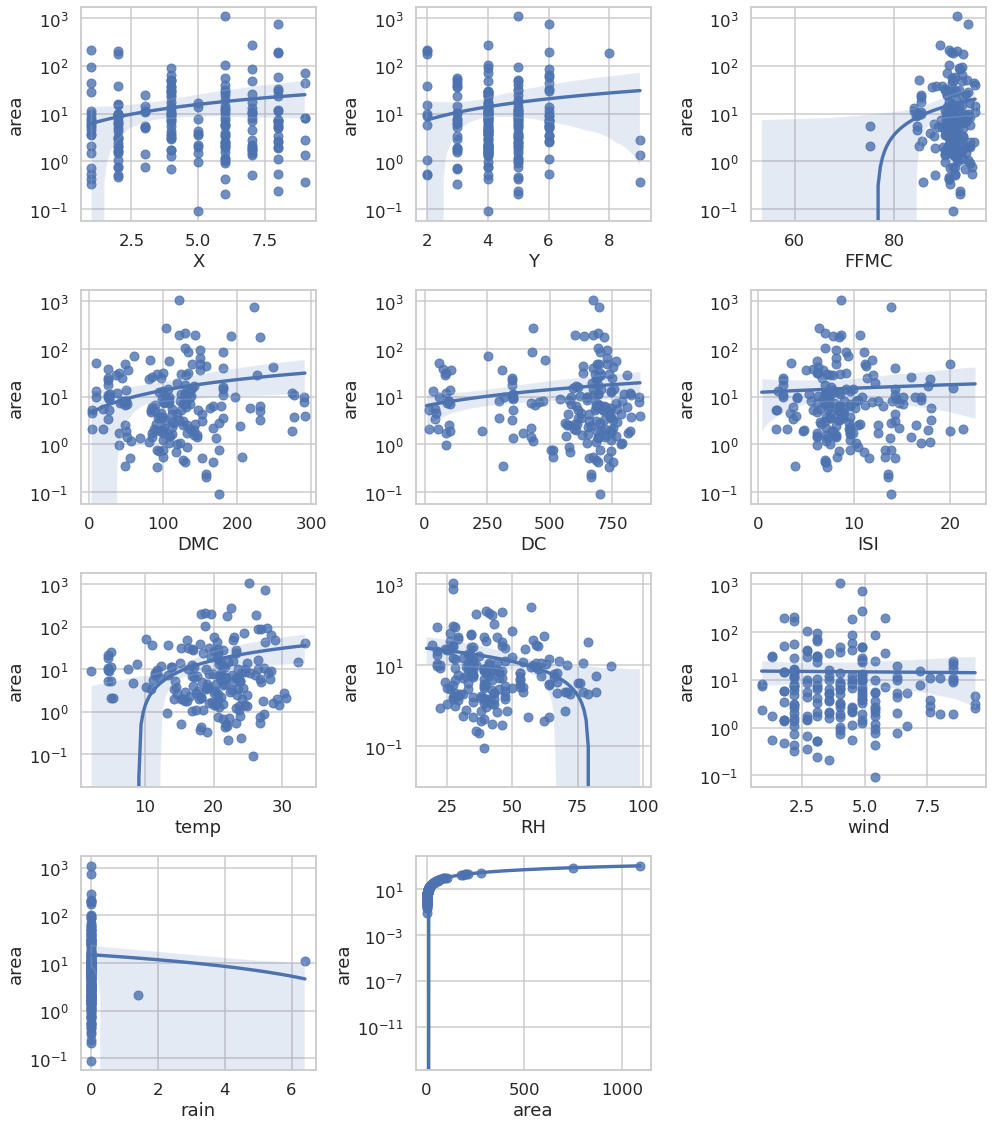

In [22]:
sns.set(font_scale=1)
sns.set_context("talk")
sns.set_style("whitegrid")

def scatter_eda(data):
    cols = data.select_dtypes(exclude = "object").columns.values
    fig, ax = plt.subplots(4, 3, figsize=(14, 16))
    ax = ax.flatten()
    ax[-1].set_axis_off()
    
    for ax,feature in zip(ax, cols):
        ax = sns.regplot(x = feature, y = 'area', ax = ax, data = data)
        ax.set_yscale("log")
    plt.tight_layout()
            
scatter_eda(Xy_train)

Quick view of scatter plots of explanatory variables with respect to outcome variable 'area'

# Pairplots

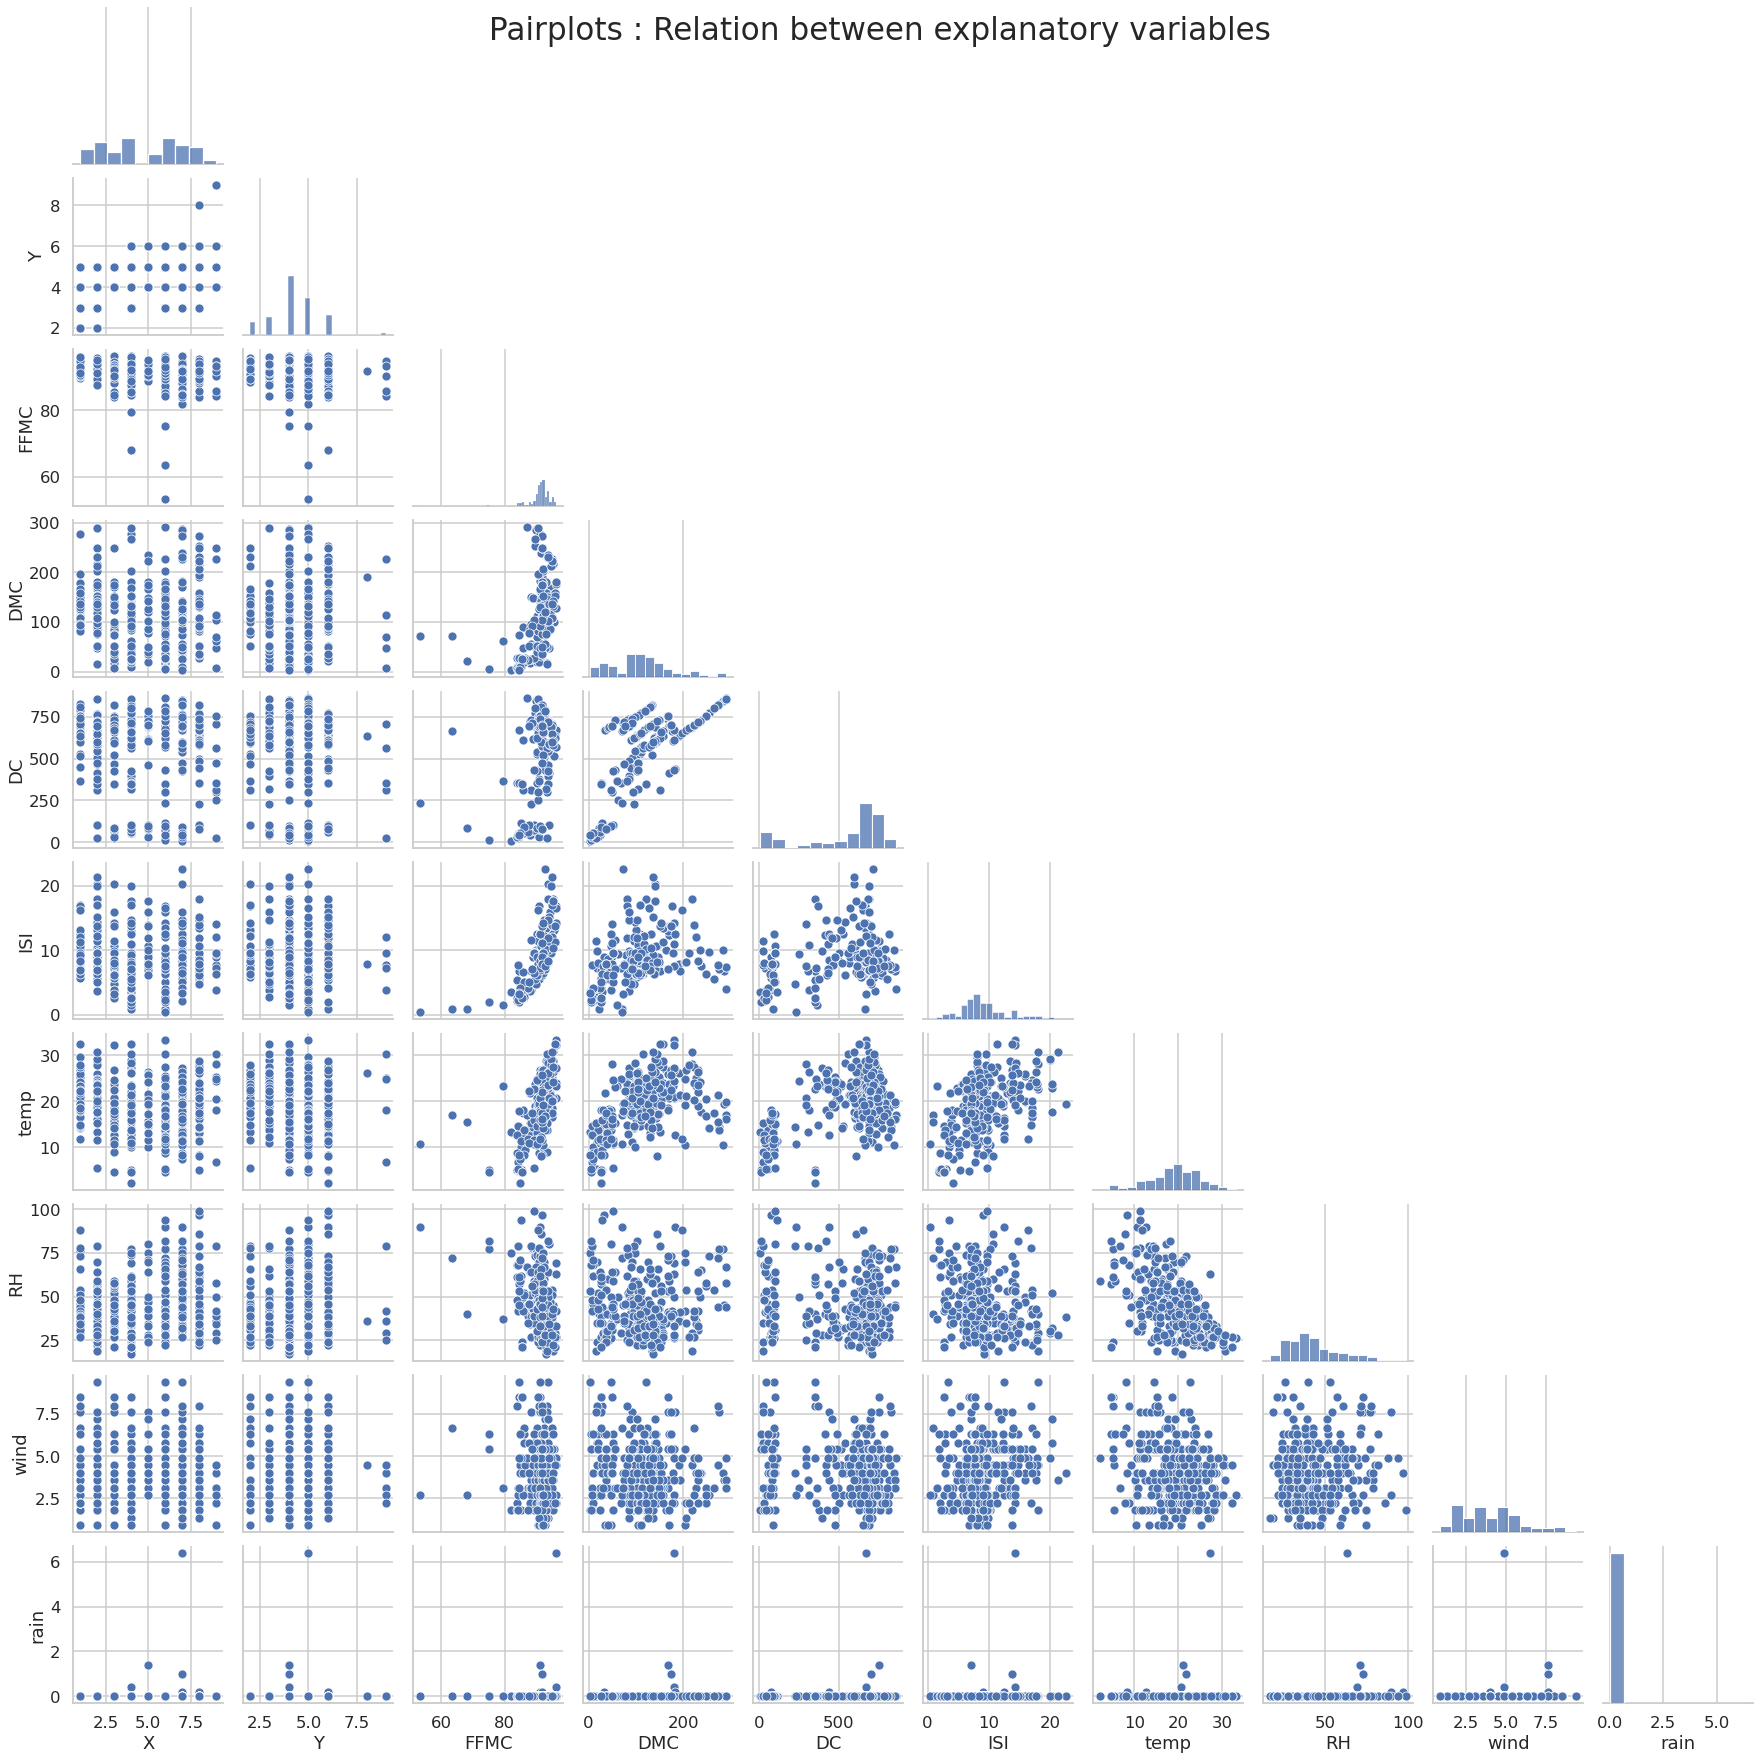

In [23]:
ax = sns.pairplot(Xy_train.iloc[:,:-1], corner = True)
ax = plt.suptitle('Pairplots : Relation between explanatory variables', size = 'xx-large')
plt.show()

Quick view of correlation among explanatory variables. We can observe:
- 'DC' and 'DMC' are positively linearly related
- 'RH' and 'temp' are negatively linearly related
- temp is positively linearly related to 'DMC' and 'DC'
- 'FFMC' and 'ISI' have smaller range of values in our dataset and hence its difficult to say much about them but they seem to have exponential and/or quadratic(maybe even polynomial of higher degree) relation to some of the variables

# Histograms

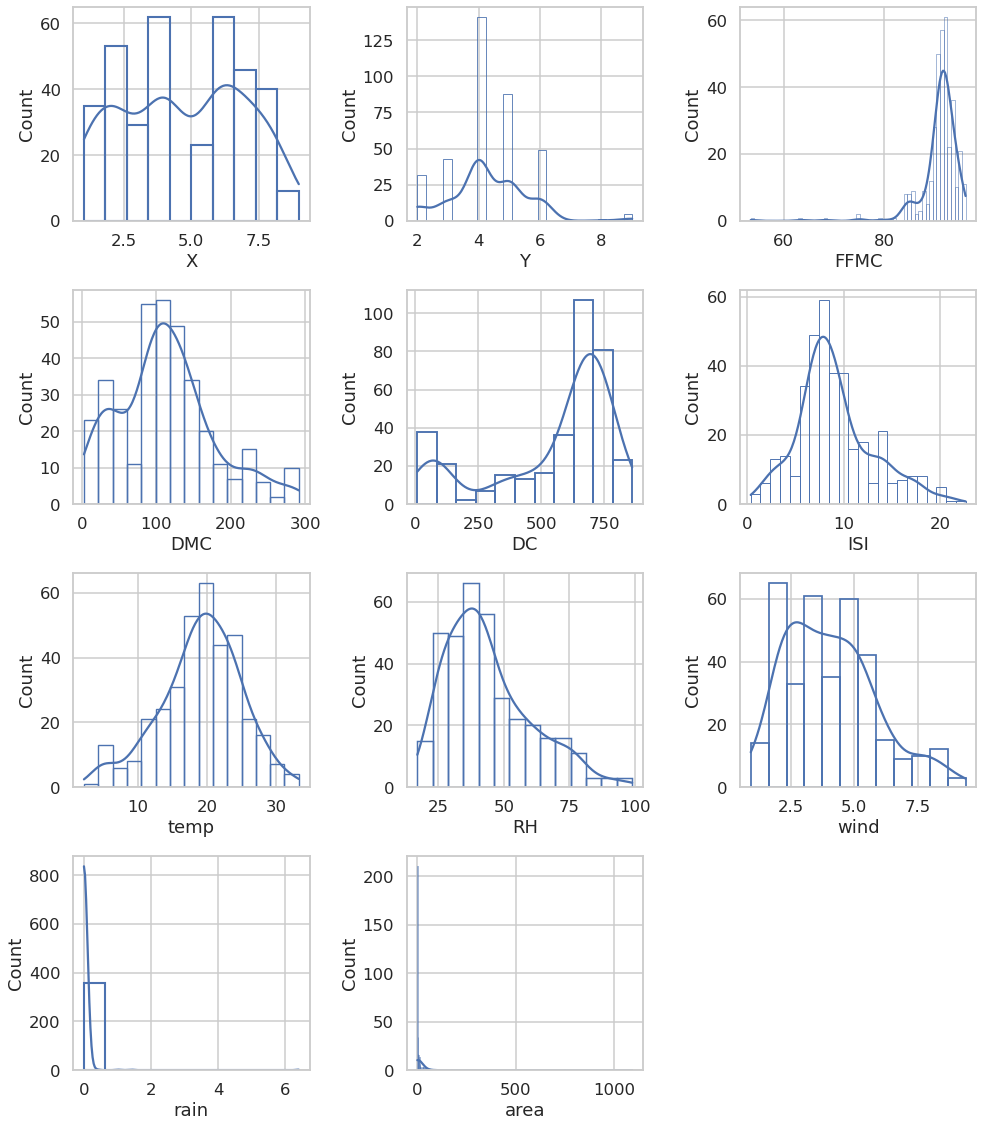

In [24]:
sns.set(font_scale=1)
sns.set_context("talk")
sns.set_style("whitegrid")

def histogram_eda(data, nrow = 4, ncol = 3, axis_off = 1, figsize = (14, 16)):
   
    fig, ax = plt.subplots(nrow , ncol, figsize = figsize)
    ax = ax.flatten()        
    for x in range(1, (axis_off + 1)):
        ax[-x].set_axis_off()
        
    for ax,feature in zip(ax, data.select_dtypes(exclude = 'object').columns):
        ax = sns.histplot(x = feature, ax = ax, kde = True, fill = False, data = data)                             
    plt.tight_layout()
            
histogram_eda(Xy_train)

We plot histogram excluding object types and note that most of the variables are near normal. We will also further explore the distribution for 'rain' and 'area' as out historgram plot doesn't give us much information about them. Also explanatory variable, 'FFMC' and 'ISI' are heavily left and right tailed and show signs of outliers and we can further check this with boxplots. We can later also check skewness for variables 'DC' and 'RH' as they look look lightly-moderately tailed.

Now, we will check total unique counts and values for 'rain' column to get a idea about it distribution

In [25]:
print(Xy_train['rain'].unique())
Xy_train['rain'].value_counts(normalize = True)

[0.  0.4 1.  1.4 0.2 6.4]


0.0    0.983287
0.2    0.005571
0.4    0.002786
1.0    0.002786
1.4    0.002786
6.4    0.002786
Name: rain, dtype: float64

In [26]:
Xy_train.query('rain > 0')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
498,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
240,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
505,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
283,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
495,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82


We observe almost all the values (98.5%) are 0 for 'rain' explanatory variable, and it doesn't show much variation. We can either bin it into two separate categories(Binary-> 0 or greater than 0) or discard/drop the whole 'rain' column. On comparing 'rain' variable where its value is more than 0 with outcome variable 'area', we don't notice any trend i.e. it looks random. So even though 'rain' practically seems like an important factor that should affect our outcome variable 'area', here for simplicity in our model we will drop the 'rain' explanatory variable as it doesn't contain much useful information for our modelling. 

In [27]:
Xy_train = Xy_train.drop(columns = 'rain')
features.remove('rain')

Xy_train.shape

(359, 12)

After dropping 'rain' column we will look at our outcome variable distribution

In [28]:
print(Xy_train['area'].nunique())
Xy_train['area'].value_counts(normalize = True)

180


0.00     0.476323
1.94     0.008357
0.43     0.005571
2.14     0.005571
0.52     0.005571
           ...   
2.69     0.002786
2.17     0.002786
1.56     0.002786
4.95     0.002786
49.37    0.002786
Name: area, Length: 180, dtype: float64

We observe 0 value is almost half (47.5%) of the entire dataset and can cause problems with out modelling
There are some techniques that can help us overcome this problem - 
* Log Transformation (log1p) can help in making the distribution more normal but won't be able to make much  difference if number of 0's is very high, 
* Using Poisson Zero Inflated Model and rounding off(discretizing) the outcome variable, 
* Discretizing outcome variable into categorical variable by binning them and then using classification methods, 
* Using 2 separate models or a mixture model - With 0 values and other without 0's (Separate models is easier than mixture modelling), 
* Using some advanced upsampling/downsampling techniques like SmoteR (https://core.ac.uk/download/pdf/29202178.pdf) or SMOGN (http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.)
* Using an advanced technique like Density-based Weighting (https://link.springer.com/article/10.1007/s10994-021-06023-5)
* Tweedie Zero gradient boosting for extremely unbalanced zero inflated data (https://www.math.mcgill.ca/yyang/resources/papers/CSSC_EMTboost.pdf)

# Boxplots

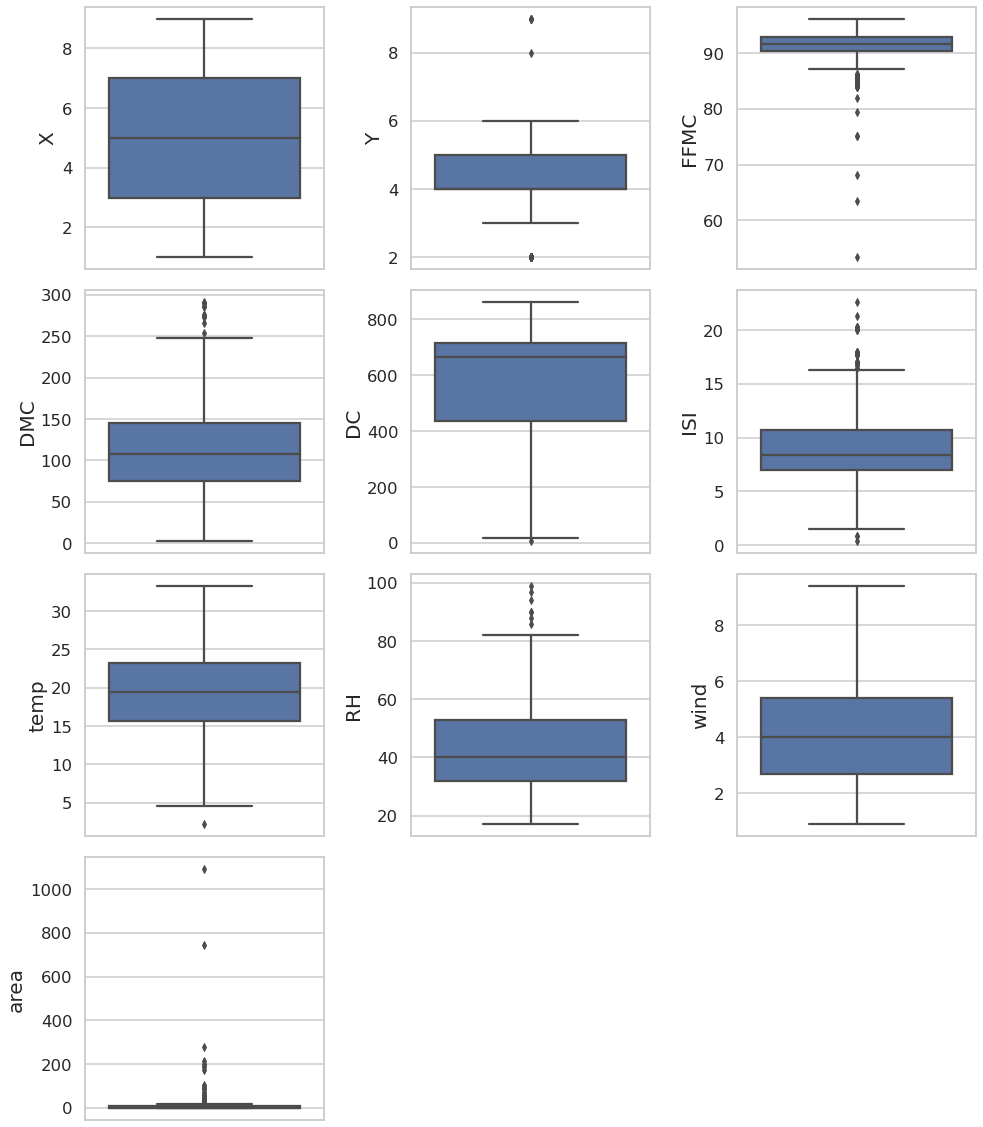

In [29]:
def boxplots_eda(data, nrow = 4, ncol = 3, axis_off = 1, figsize = (14, 16)):
    fig, ax = plt.subplots(nrow , ncol, figsize = figsize)
    ax = ax.flatten()
    for x in range(1, (axis_off + 1)):
        ax[-x].set_axis_off()
    
    for ax,feature in zip(ax, data.select_dtypes(exclude= 'object').columns):
        ax = sns.boxplot(ax = ax, y = feature, data = data)
        ax.set_ylabel(feature, fontsize = 20)

        plt.tight_layout()
                
boxplots_eda(Xy_train, axis_off = 2)

We plot boxplots and observe outliers in almost all our explanatory variables as well as in our outcome variables. 
We will try to use log transformation on those variables which were highly skewed, to make them more normal and also as they can help in fixing our outliers.
The other variables which aren't skewed but have outliers, we will leave them be as we aren't sure if they are actual errors in our reading or not and will try to use a robust model which can handle outliers if needed.

In [30]:
# Function for calculating IQR

def iqr(data):
    q25, q75 = np.percentile(data, [25,75], axis = 0)
    iqr = q75 - q25
    min = q25 - 1.5 *(iqr)
    max = q75 + 1.5 *(iqr)
    return min,max

# Funtion for finding outliers in dataset  using  IQR

def outlier_list(data):
    out_list = []
    feature = data.columns
    co = 0
    
    min,max = iqr(data)
    
    for coln in feature:
        out_list.append(len([x for x in data[coln] if x > max[co] or x < min[co]]))
        co += 1
    
    outlier_df = pd.DataFrame(out_list, columns = ['No of Outliers'], index = feature)
    outlier_df['% of Outliers'] = (outlier_df * 100)/ len(Xy_train)
    
    return outlier_df

outlier_df_bf = outlier_list(Xy_train[Xy_train.select_dtypes(exclude = "object").columns])

print(outlier_df_bf)

      No of Outliers  % of Outliers
X                  0       0.000000
Y                 38      10.584958
FFMC              34       9.470752
DMC               12       3.342618
DC                 1       0.278552
ISI               27       7.520891
temp               1       0.278552
RH                 7       1.949861
wind               0       0.000000
area              43      11.977716


List of total outliers found by IQR method.

We use IQR method as our data is skewed, not normally distributed and also is a more stable approach in comparison to 'Z' test for outliers which gets further affected by presence of outliers.

We can plot boxplots of explantory variables 'day' and 'month' against outcome varibale 'area' to see how they are related

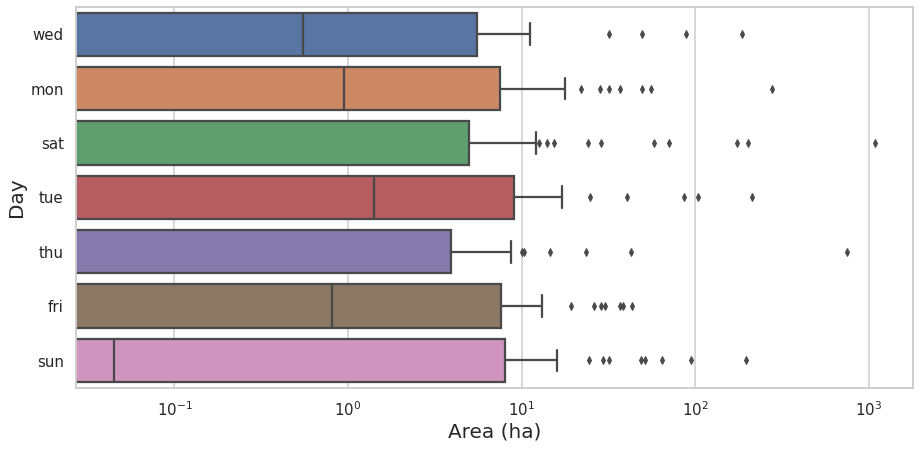

In [31]:
def cat_boxplots(data, response):
    plt.figure(figsize = (15, 7))
    ax = sns.boxplot(y = response, x = 'area', data = data, orient = 'h')
    ax.set_xscale("log")
    ax.set_xlabel("Area (ha)", fontsize = 20)
    ax.set_ylabel("Day", fontsize = 20)
    ax.tick_params(labelsize = 15)
    plt.show()

cat_boxplots(Xy_train, 'day')

We observe chances of a large fire are more on friday, saturday and sunday compared to other days. This can be due to human intervention as people usually tend to go camping on the last working day before the holidays (weekends) or on the weekends itself.

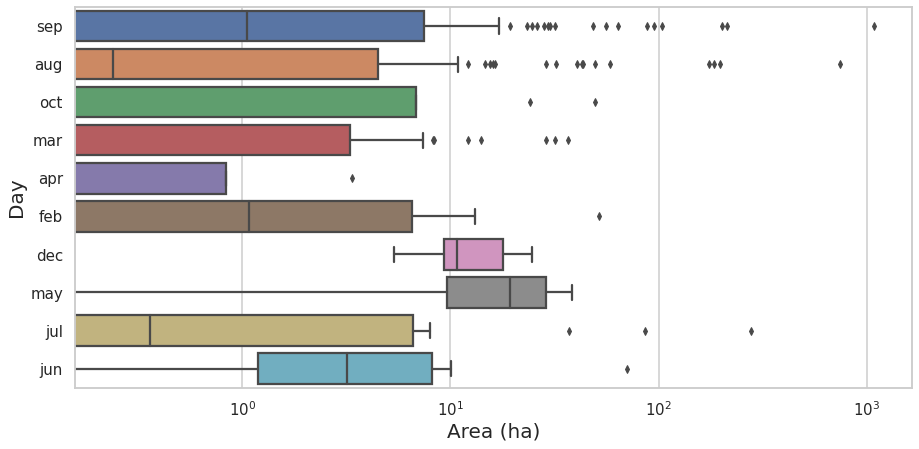

In [32]:
cat_boxplots(Xy_train, 'month')

#### Here again we observe that chances of a large fire is more in the months of August and September. If this rise is due to human intervention as well, the time period(months) will be country specific as holidays, tourist season can be different for different countries. Thus we cannot comment much as we would need detailed information regarding the same.
#### We also note that the month of december consists of some medium size forest fires (9)

# Correlation Plot of Variables - Heatmap

#### We plot heatmap of features having correlation with respect to outcome variable 'area' in descending order. Here we will be using Spearman rank correlation as it is more robust to the effect of outliers than Pearson’s correlations coefficient.
#### Thus we can remove features having high correlation amongst other features and lowest correlation with status. 
#### We remove those features having more than 0.85 correlation with other features except 'status'(outcome variable).


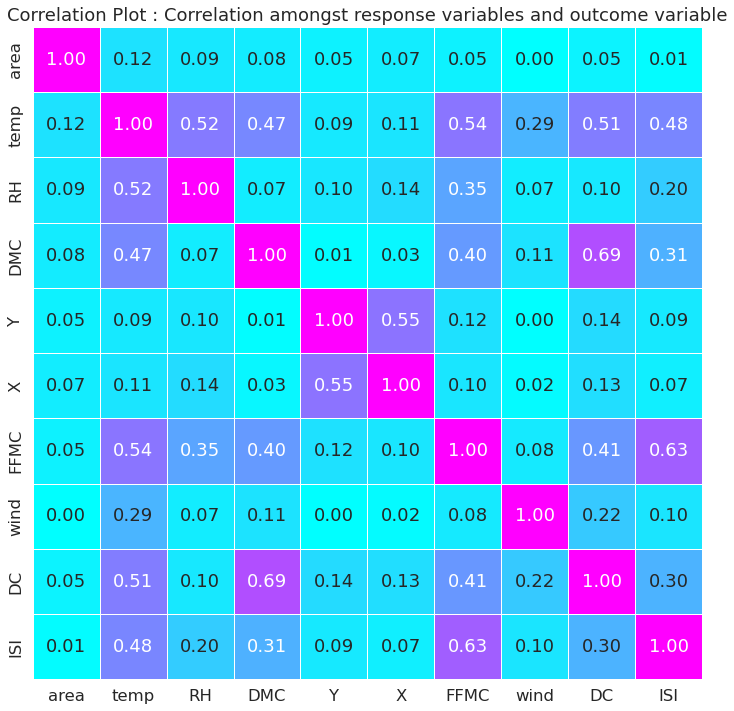

In [33]:
plt.figure(figsize = (12, 12))
sns.set(font_scale=1.5)

# We use abs to see aximum value of correlation with status (+ or -) 
corr_map = abs(Xy_train.corr(method = 'spearman'))
corr_cols = corr_map.nlargest(24,'area')['area'].index
coff_val = np.corrcoef(Xy_train[corr_cols].values.T)
sns.heatmap(abs(coff_val), annot = True, cbar = False, linewidths=.5, cmap = plt.cm.cool, fmt='.2f', 
            xticklabels = corr_cols.values, yticklabels = corr_cols.values)
plt.title('Correlation Plot : Correlation amongst explanatory variables and outcome variable')
plt.show()

None of the explanatory variables seem to have high correlation amongst each other.

Note: If we would have decided to remove and or replace outliers with some other value, then we should have made correlation plot afterwards as it can have a significant effect on the values.

## Pre-Processing and Transformation

We will first perform check for columns skewed with value more than 0.75 and perform log1p transformation on them to make them more normal and also to help with the outliers if any.

In [34]:
# Calculating skewness of dataset

skew_limit = 0.75
skew_vals = Xy_train.select_dtypes(exclude= 'object').skew().drop(['X','Y'])
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols_bf = skew_cols.index.values

print(f"Columns skewed more than 0.75: {skew_cols_bf}")
Xy_train[skew_cols_bf].agg(['skew']).transpose()

Columns skewed more than 0.75: ['area' 'RH' 'DC' 'FFMC']


,skew
area,11.154595
RH,0.894385
DC,-1.113906
FFMC,-4.309223


Using skewtest we get the list of features skewed more than 0.75. Also, we see specifically which variables are positively skewed and which are negatively skewed.

### Log1p Transformation

In [35]:
# log1p transformation since minimum values is 0 for some of the features

def log_transform(data, skew_cols_name):
    """ Log(1+x) transformation for positive and negatively skewed data
    """
    transformed_df = data.copy()
    pos_skew = data[skew_cols_name].agg(['skew']).transpose().query('skew > 0').index
    neg_skew = data[skew_cols_name].agg(['skew']).transpose().query('skew < 0').index
    
    for cols in pos_skew:
        transformed_df[cols] = np.log1p(transformed_df[cols])

    # Reversing distribution before applying log transform
    for cols in neg_skew:
        transformed_df[cols] = np.log1p(max(transformed_df[cols] + 1) - transformed_df[cols])
        
    return transformed_df

In [36]:
transf_df = log_transform(Xy_train, skew_cols_bf)
transf_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,area
311,3,4,sep,wed,1.945910,134.7,3.808882,7.2,18.5,3.433987,2.7,0.000000
332,7,4,sep,mon,1.887070,108.4,4.591071,6.2,19.3,3.806662,2.2,0.000000
172,1,4,aug,sat,2.079442,96.9,5.473950,8.9,14.2,3.988984,1.8,1.504077
1,7,4,oct,tue,2.028148,35.4,5.265278,6.7,18.0,3.526361,0.9,0.000000
457,8,6,aug,sat,1.504077,231.1,4.993828,8.4,18.9,4.174387,4.9,0.000000


In [37]:
# Calculating skewness of dataset

skew_limit = 0.75
skew_vals = transf_df.select_dtypes(exclude= 'object').skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending = False)
skew_cols_af = skew_cols.index.values

print(f"Columns skewed more than 0.75: {skew_cols_af}")
transf_df[skew_cols_bf].agg(['skew']).transpose()

Columns skewed more than 0.75: ['area' 'DC']


,skew
area,1.292597
RH,0.150213
DC,-0.826999
FFMC,0.364255


After transformation, except for 'RH' our other variables distribution are still skewed than the set value 0.75. We can now check our histogram and boxplots to see how our distribution and outliers got affected

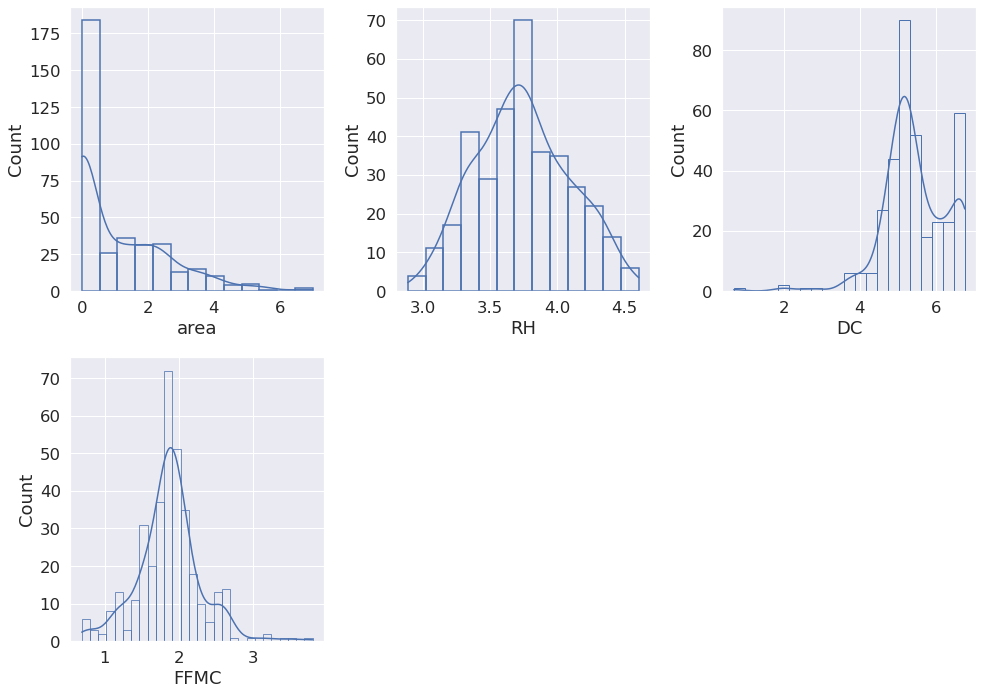

In [38]:
histogram_eda(transf_df[skew_cols_bf], nrow = 2, axis_off = 2, figsize = (14,10))

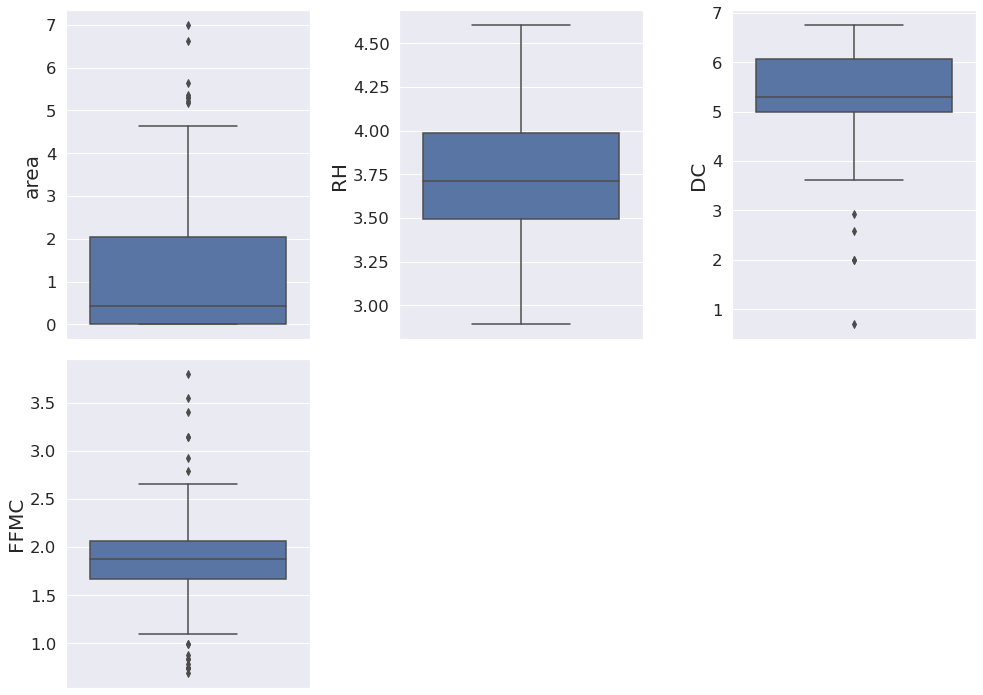

In [39]:
boxplots_eda(transf_df[skew_cols_bf], nrow = 2, axis_off = 2, figsize = (14,10))

Checking the change in number and percentage of outliers

In [40]:
outlier_df_af = outlier_list(transf_df[transf_df.select_dtypes(exclude = "object").columns])
print(outlier_df_af)

      No of Outliers  % of Outliers
X                  0       0.000000
Y                 38      10.584958
FFMC              18       5.013928
DMC               12       3.342618
DC                 5       1.392758
ISI               27       7.520891
temp               1       0.278552
RH                 0       0.000000
wind               0       0.000000
area               8       2.228412


We can also compare before and after outlier dataframes to see how log transformation affects our outliers

In [41]:
pd.concat([outlier_df_bf,outlier_df_af], axis = 1, keys = ['before log transform', 'after log transform'])

before log transform               after log transform              
           No of Outliers % of Outliers      No of Outliers % of Outliers
X                       0      0.000000                   0      0.000000
Y                      38     10.584958                  38     10.584958
FFMC                   34      9.470752                  18      5.013928
DMC                    12      3.342618                  12      3.342618
DC                      1      0.278552                   5      1.392758
ISI                    27      7.520891                  27      7.520891
temp                    1      0.278552                   1      0.278552
RH                      7      1.949861                   0      0.000000
wind                    0      0.000000                   0      0.000000
area                   43     11.977716                   8      2.228412

#### On comparison we see the skewed columns with outliers have reduced in number after log transformation except for column 'DC' where it has slightly increased.

In [42]:
transf_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,4.696379,4.300836,1.870600,113.209471,5.434172,9.106128,19.088579,3.745167,4.057382,1.119342
std,2.323012,1.254611,0.428415,64.205245,0.841977,3.967144,5.851768,0.350796,1.818863,1.423960
min,1.000000,2.000000,0.693147,3.000000,0.693147,0.400000,2.200000,2.890372,0.900000,0.000000
25%,3.000000,4.000000,1.667707,75.300000,4.993828,7.000000,15.700000,3.496508,2.700000,0.000000
50%,5.000000,4.000000,1.871802,108.300000,5.288772,8.400000,19.500000,3.713572,4.000000,0.418710
75%,7.000000,5.000000,2.066863,145.400000,6.057005,10.750000,23.250000,3.988984,5.400000,2.041078
max,9.000000,9.000000,3.802208,291.300000,6.750751,22.600000,33.300000,4.605170,9.400000,6.995620


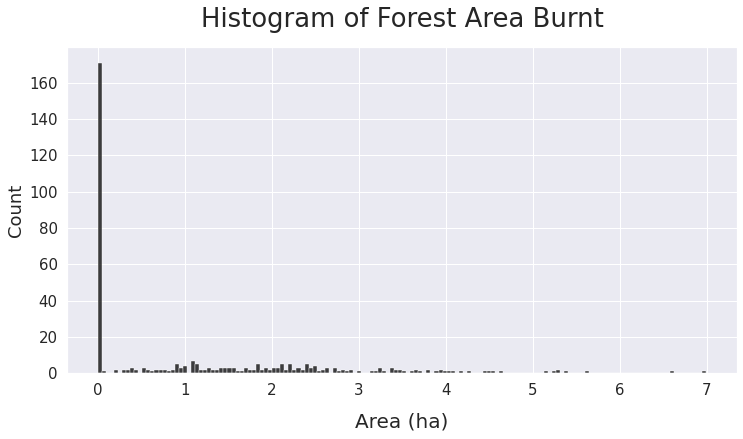

In [43]:
# Histogram for area

plt.figure(figsize = (12,6))
ax = sns.histplot(transf_df['area'], bins = 150, color = 'Black')
ax.set_title("Histogram of Forest Area Burnt", pad = 20, size = 'x-large')
ax.xaxis.labelpad = 15
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_xlabel("Area (ha)", fontsize = 20)
plt.show()

#### Even after performimng log transformation, we observe our outcome variable 'area' is still highly skewed due to the presence of large number of 0's.

# Scatterplots

Relation between explanatory variable and outcome variable

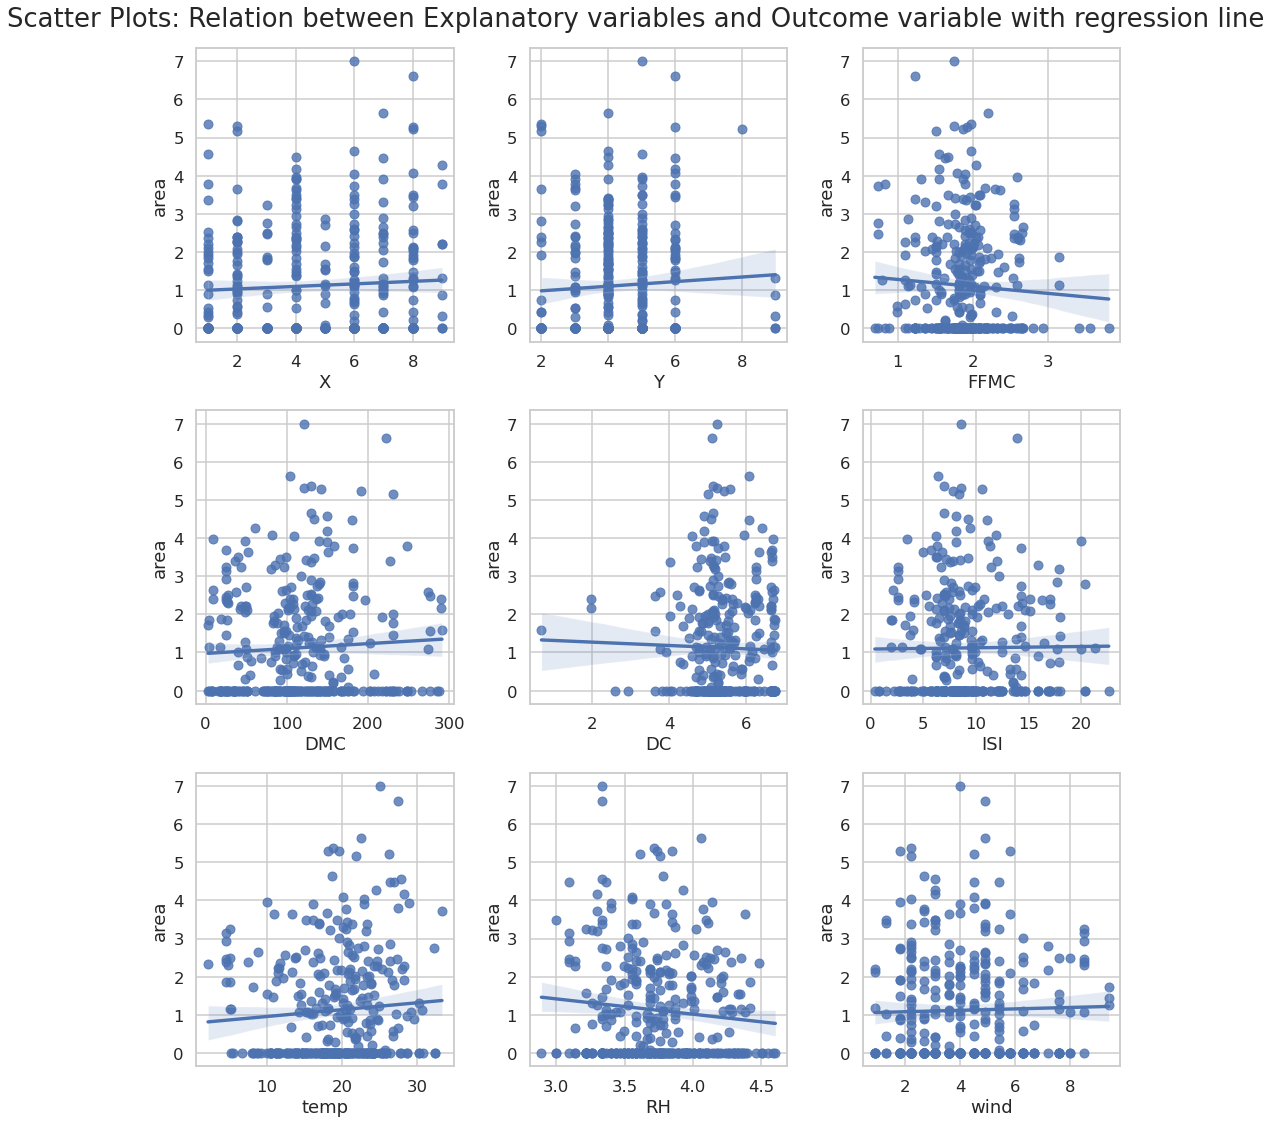

In [44]:
sns.set(font_scale=1)
sns.set_context("talk")
sns.set_style("whitegrid")

def scatter_eda(data):
    cols = data.select_dtypes(exclude = "object").columns.values
    fig, ax = plt.subplots(3, 3, figsize=(14, 16))
    ax = ax.flatten()
    
    for ax,feature in zip(ax, cols):
        ax = sns.regplot(x = feature, y = 'area', ax = ax, data = data)
    plt.suptitle(size = 'x-large',
        t = 'Scatter Plots: Relation between Explanatory variables and Outcome variable with regression line')
    plt.tight_layout()
            
scatter_eda(transf_df)

#### Exploring linear relationship of outcome variable 'area' with explanatory variables after log transformation. Grahically, we see that a simple linear model doesn't seem to capture the trend effectivly(model the curve) for our data, and a curvilinear model might be a better representation.

## Cyclical Encoding for Day and Month

#### First we will encode respone variables 'day' and 'month' to integers. After encoding explanatory varibales 'month' and 'day' to integers, we can perform cyclical encoding so that represent the encoding correctly. Lastly, after the creation of new variables (sin and cos terms for 'day' and 'month'), we can remove/drop our older 'day' and 'month' variables from our datafame

#### We will create a function to perform cyclical encoding on our 'day' and 'month' variables as described above

In [45]:
print(transf_df['day'].unique())
print(transf_df['month'].unique())

['wed' 'mon' 'sat' 'tue' 'thu' 'fri' 'sun']
['sep' 'aug' 'oct' 'mar' 'apr' 'feb' 'dec' 'may' 'jul' 'jun']


In [46]:
def cyclical_enc(data):    
    cleanup_nums = { "day": {'fri': 5, 'tue': 2, 'sat': 6, 'sun': 7, 'mon': 1, 'wed': 3, 'thu': 2},
                "month": {'mar': 3, 'oct': 10, 'aug': 8, 'sep': 9, 'apr': 4, 'jun': 5, 'jul': 6,
                          'feb': 2, 'jan': 1, 'dec': 12, 'may': 5, 'nov': 11}
               }
    data = data.replace(cleanup_nums)
    
    data['day_sin'] = np.sin((data.day) * (2 * np.pi/7))
    data['day_cos'] = np.cos((data.day) * (2 * np.pi/7))
    data['month_sin'] = np.sin((data.month) * (2 * np.pi/12))
    data['month_cos'] = np.cos((data.month) * (2 * np.pi/12))
    data = data.drop(columns = ['day' ,'month'])
    return data

In [47]:
enc_Xy_train  = cyclical_enc(transf_df)

In [48]:
enc_Xy_train.shape

(359, 14)

In [49]:
enc_Xy_train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,day_sin,day_cos,month_sin,month_cos
311,3,4,1.945910,134.7,3.808882,7.2,18.5,3.433987,2.7,0.000000,0.433884,-0.900969,-1.000000,-1.836970e-16
332,7,4,1.887070,108.4,4.591071,6.2,19.3,3.806662,2.2,0.000000,0.781831,0.623490,-1.000000,-1.836970e-16
172,1,4,2.079442,96.9,5.473950,8.9,14.2,3.988984,1.8,1.504077,-0.781831,0.623490,-0.866025,-5.000000e-01
1,7,4,2.028148,35.4,5.265278,6.7,18.0,3.526361,0.9,0.000000,0.974928,-0.222521,-0.866025,5.000000e-01
457,8,6,1.504077,231.1,4.993828,8.4,18.9,4.174387,4.9,0.000000,-0.781831,0.623490,-0.866025,-5.000000e-01


# Transform same for test  dataset

#### We will perform the same operations, transformations as those performed on our train set and then save them.

#### Note: We aren't creating/building a pipeline model here, as I prefer saving the data analysis files into 3 parts. The first part covers data wrangling and EDA, the second parts consists of scaling and modelling and in the last part we will be building our pipeline that will simplify our model deployment in the end. The reason the file is divided into 3 parts is sometimes we have to restart our kernel (due to bugs in our modules or any other reason) and thus is more efficient when the file is divided. Also, its more useful and efficient when the modelling is itself divided into separate files/parts (when building different statistical models (different from machine learning), when using more advanced custom techniques not in sklearn, implementation of new alogrithms from research papers or any other reason that will simplify the process). Lastly, I find it easier to navigate and read through the analysis and to perform any changes in the file.

In [50]:
Xy_test = Xy_test.drop(columns = 'rain')
Xy_test.shape

(154, 12)

In [51]:
# log1p transforation since minimum values is 0 for some of the features

transf_df = log_transform(Xy_test, skew_cols_bf)

In [52]:
enc_Xy_test  = cyclical_enc(transf_df)

In [53]:
## Saving after data wrangling, EDA and preprocessing of data.

outputfile_1 = 'forest_fires_wrangled_train.csv'
outputfile_2 = 'forest_fires_wrangled_test.csv'
enc_Xy_train.to_csv(outputfile_1, index = False)
enc_Xy_test.to_csv(outputfile_2, index = False)